데이터 준비하기
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense


import pandas as pd
import matplotlib.pyplot as plt

winequality = pd.read_csv('/content/winequality-red.csv') 
print(winequality.head())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


데이터셋 생성하기

In [ ]:
X = winequality.iloc[:, 0:11] #속성
y = winequality.iloc[:, 11] #답

print(y)

print(set(y))

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
{3, 4, 5, 6, 7, 8}


레이블을 범주형 형태로 변경 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
Y_encodered = encoder.transform(y)

print(Y_encodered)

Y = np_utils.to_categorical(Y_encodered)
#스칼라 형식으로 숫자로 만들고 그 다음 범주형으로 만들기 3->[1., 0., 0., 0., 0., 0.] 4->[0., 1., 0., 0., 0., 0.] ...

[2 2 2 ... 3 2 3]


In [ ]:
Y

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

데이터셋 전처리 및 검증 데이터셋 만들기

In [ ]:
import numpy as np

#데이터 표준화
mean = np.mean(X, axis=0)
std = np.std(X, axis = 0)

X= (X - mean) /std

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=777)  #X는 속성 y는 답  훈련:테스트(8:2)

print(X_train.shape) #속성(11가지) 훈련(학습) 데이터 0~10열
print(y_train.shape) #정답(6개중에 1개) 훈련(학습) 데이터 




(1279, 11)
(1279, 6)


모델 구성하기 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.

model.add(Dense(64, activation = 'relu', input_shape = (11, )))
model.add(Dense(12, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(6, activation = 'softmax')) # 10개의 출력을 가지는 신경망 softmax <- 다중분류할 때는 이 함수를 사용

모델 학습과정 설정하기

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', #다중 분류 문제
              metrics=['accuracy'])


모델 학습시키기

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=200, 
                    batch_size=10,
                    validation_data = (X_test, y_test))


Epoch 1/200
128/128 [==============================] - 0s 3ms/step - loss: 1.4073 - accuracy: 0.4582 - val_loss: 1.0738 - val_accuracy: 0.6062
Epoch 2/200
128/128 [==============================] - 0s 1ms/step - loss: 1.0876 - accuracy: 0.5536 - val_loss: 0.9432 - val_accuracy: 0.6156
Epoch 3/200
128/128 [==============================] - 0s 1ms/step - loss: 1.0229 - accuracy: 0.5864 - val_loss: 0.9084 - val_accuracy: 0.6531
Epoch 4/200
128/128 [==============================] - 0s 1ms/step - loss: 0.9907 - accuracy: 0.5880 - val_loss: 0.8910 - val_accuracy: 0.6500
Epoch 5/200
128/128 [==============================] - 0s 1ms/step - loss: 0.9724 - accuracy: 0.5981 - val_loss: 0.8738 - val_accuracy: 0.6250
Epoch 6/200
128/128 [==============================] - 0s 1ms/step - loss: 0.9579 - accuracy: 0.6013 - val_loss: 0.8628 - val_accuracy: 0.6500
Epoch 7/200
128/128 [==============================] - 0s 1ms/step - loss: 0.9437 - accuracy: 0.6075 - val_loss: 0.8568 - val_accuracy: 0.6594

모델 평가하기 및 학습과정 그리기

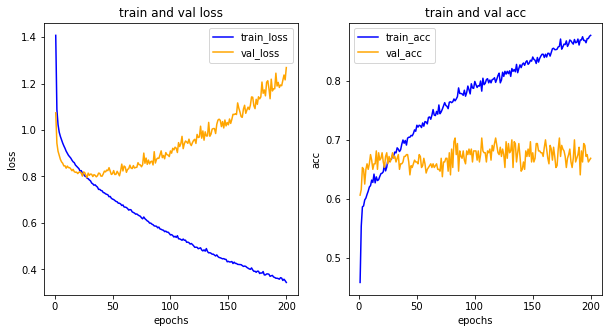

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델 평가하기

In [ ]:
scores = model.evaluate(X_test, y_test)
printkiiii("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

10/10 [==============================] - 0s 1ms/step - loss: 1.2686 - accuracy: 0.6687
accuracy: 66.87%


훈련 데이터의 손실함수는 점점 낮아지고 정확도는 올라갔다. 하지만 검증 데이터의 손실함수는 점점 올라갔고 정확도는 변화가 거의 없다. 따라서 모델이 오버피팅 된 것을 알 수 있다.